In [ ]:
#check out merlion
from google.colab import drive
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1234)  # for reproducibility

#this syncs your drive up as the file system, you will have to
#run this block and then authorize the drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
myPath = "/content/drive/My Drive/Senior Design C41/Data/"
myPath1 = "/content/drive/My Drive/Senior Design C41/Data2/"
onlyFiles = [f for f in listdir(myPath) if isfile(join(myPath, f)) and f[-3:]=='csv']
onlyFiles1 = [f for f in listdir(myPath1) if isfile(join(myPath1, f)) and f[-3:]=='csv']

In [ ]:
len(onlyFiles)

1729

In [ ]:
curr_data = curr_data[curr_data.columns.drop(list(curr_data.filter(regex='confidence')))]

In [ ]:
full_data=pd.DataFrame()
shot = 0
for i in range(len(onlyFiles)):
    curr_data = pd.read_csv(myPath + onlyFiles[i])
    curr_str = onlyFiles[i].split('-')
    curr_data['person'] = [curr_str[2][:-4] for x in range(len(curr_data))]
    curr_data['class'] = [int(curr_str[1]) for x in range(len(curr_data))]
    shot = shot + 1
    curr_data['shot'] = [shot for x in range(len(curr_data))]
    full_data = pd.concat([curr_data, full_data])

In [ ]:
for i in range(len(onlyFiles1)):
    curr_data = pd.read_csv(myPath1 + onlyFiles1[i])
    curr_str = onlyFiles1[i].split('-')
    curr_data['person'] = [curr_str[2][:-4] for x in range(len(curr_data))]
    curr_data['class'] = [int(curr_str[1]) for x in range(len(curr_data))]
    shot = shot + 1
    curr_data['shot'] = [shot for x in range(len(curr_data))]
    full_data = pd.concat([curr_data, full_data])

In [ ]:
full_data = full_data[full_data.columns.drop(list(full_data.filter(regex='confidence')))]

In [ ]:
full_data.to_csv("/content/drive/My Drive/full_data1.csv")

In [ ]:
full_data = pd.read_csv("/content/drive/My Drive/full_data.csv")

STOP HERE for now

In [ ]:
full_data = full_data.drop('Unnamed: 0',axis=1)

In [ ]:
compare_df=full_data[['person','class','shot']].drop_duplicates()
justin_compare_df=compare_df[compare_df.person=='Justin']
brendan_compare_df=compare_df[compare_df.person=='Brendan']
carl_compare_df=compare_df[compare_df.person=='Carl']

In [ ]:
justin_1=justin_compare_df[justin_compare_df['class']==1]['class'].values
justin_0=justin_compare_df[justin_compare_df['class']==0]['class'].values
brendan_1=brendan_compare_df[brendan_compare_df['class']==1]['class'].values
brendan_0=brendan_compare_df[brendan_compare_df['class']==0]['class'].values
carl_1=carl_compare_df[carl_compare_df['class']==1]['class'].values
carl_0=carl_compare_df[carl_compare_df['class']==0]['class'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


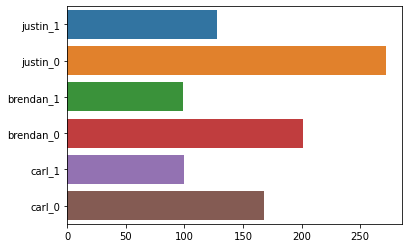

In [ ]:
import seaborn as sns

x = ['justin_1', 'justin_0', 'brendan_1', 'brendan_0', 'carl_1', 'carl_0']
y = [len(justin_1), len(justin_0), len(brendan_1), len(brendan_0), len(carl_1), len(carl_0)]

sns.barplot(y, x)
plt.show()

In [ ]:
len(justin_1)/(len(justin_1)+len(justin_0))

0.32

In [ ]:
len(brendan_1)/(len(brendan_1)+len(brendan_0))

0.33

In [ ]:
len(carl_1)/(len(carl_1)+len(carl_0))

0.373134328358209